# Formation Pratique 6 : k-NN, sklearn et arbres de décision

Dans cette formation pratique, nous allons entrainer et tester nos premiers modèles de machine learning sur le jeu de données *Adult*, qui a été présenté et étudié lors de la Formation Pratique 2.

On commencera par séparer les données d'entrainement et de test avec la librairie *scikit-learn*, et faire notre propre implémentation de l'algorithme des k plus proches voisins. Enfin, nous utiliserons *scikit-learn* pour très facilement deployer un modèle de foret d'arbres de décision.

## 6.1 Séparation des données d'entrainement et de test

Commençons par charger le dataset *Adult* avec pandas.

In [ ]:
import numpy as np
import pandas as pd

!wget -nc https://raw.githubusercontent.com/Cours-EDUlib/DIRO-SD1FR/master/FP/FP2/adult.csv

df = pd.read_csv("adult.csv")
df.head()

File ‘adult.csv’ already there; not retrieving.



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


On ne garde que les colonnes avec des valeurs numériques (par soucis de simplicité), et on sépare la variable que l'on cherche à prédire (*income*) des variables dont nous nous servirons comme entrée

In [ ]:
cts_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
y = np.array(df['income'])
X = np.array(df[cts_columns])

À présent, nous pouvons séparer les données d'entrainement et de test. Dans le cadre de cette FP, nous n'utiliserons pas de données de validation, par soucis de simplicité. L'utilisation d'un jeu de données de validation sera abordé dans la Formation Pratique 7.

Pour cela, la très utile librairie *scikit-learn* dispose d'une méthode très simple d'utilisation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Nous avons séparé notre jeu de données entre entrainement (80% des données) et test (20% des données). Le but est d'entrainer un modèle à prédire **y_train** en utilisant l'information de **X_train**, en espérant que le modèle ainsi entrainé puisse efficacement prédire **y_test** à partir de **X_test**, bien qu'aucun de ces points de tests n'ai été observé à l'entrainement.

## 6.2 k plus proches voisins

Dans cette section, nous allons implémenter la méthode des k plus proches voisins. Pour rappel, le principe de cette méthode est le suivant : étant donné un point d'entrée x et un entier k, on trouve les k points du jeu de données d'entrainement les plus proches de x $[x_0, x_1, ..., x_k]$, puis on retourne comme prédiction la classe majoritaire parmis $[y_0, y_1, ..., y_k]$

## 6.2.1 Implémentation : 
Nous allons definir une classe **MyKNN**, avec une méthode pour instancier la classe (*init*), une méthode pour l'entrainement (*fit*, qui consiste juste à mémoriser le jeu de données d'entrainement dans le cas de k plus proches voisins), une méthode pour calculer la distance euclidienne entre deux points (*calculate_euclidean*), une méthode pour calculer les k plus proches voisins d'un point (*nearest_neighbors*), et enfin une méthode pour effectuer les prédictions sur un ensemble de points (*predict*).

**Question** : Compléter les méthodes *nearest_neighbors* et *predict* dans la cellule de code suivante, en suivant les instructions:

In [ ]:
class MyKNN():
  def __init__(self, k):
    # Cette méthode instancie la classe et sauvegarde 'k'. Rien à modifier.
    self.k=k

  def fit(self, X_train, y_train):
    # Pour entrainer k plus proches voisins, on sauvegarde simplement les données d'entrainement. Rien à modifier.
    self.X_train = X_train
    self.y_train = y_train

  def calculate_euclidean(self, x1, x2):
    # On se sert ici de numpy pour calculer la distance euclidienne entre deux points. Rien à modifier.
    return np.linalg.norm(x1-x2)

  def nearest_neighbors(self, x_test):
    # On cherche maintenant à calculer les k points de self.X_train les plus proches du point x_test

    distances = [] # TODO : utiliser la methode self.calculate_euclidean pour calculer les distances entre x_test et chaque point de self.X_train
                   # distances[i] doit retourner la distance euclidienne entre x_test et self.X_train[i]

    distance_idx = list(enumerate(distances)) # On obtient une liste des paires [(distance0, 0), (distance1, 1), ...]
    distance_idx.sort(key=lambda x:x[0]) # On tri distance_idx par ordre croissant de distance

    neighbors = [] # TODO : utiliser distance_idx pour extraire les indices des k plus proches voisins de x_test, et les stocker dans neighbors

    return neighbors
    
  def predict(self, test_set):
    # Enfin, pour un ensemble de points test_set, on cherche à calculer les predictions de k plus proche voisin sur chaque point
    predictions = []

    for test_sample in test_set:
      neighbors = self.nearest_neighbors(test_sample) # indices des k plus proches voisins

      prediction = 0 # TODO : Calculer la prediction du point test_sample en utilisant neighbors

      predictions.append(prediction)

    return predictions

#### Réponses (essayez d'abord de répondre par vous-même avant de regarder la réponse)



In [ ]:
class MyKNN():
  def __init__(self, k):
    # Cette méthode instancie la classe et sauvegarde 'k'. Rien à modifier.
    self.k=k

  def fit(self, X_train, y_train):
    # Pour entrainer k plus proches voisins, on sauvegarde simplement les données d'entrainement. Rien à modifier.
    self.X_train = X_train
    self.y_train = y_train

  def calculate_euclidean(self, x1, x2):
    # On se sert ici de numpy pour calculer la distance euclidienne entre deux points. Rien à modifier.
    return np.linalg.norm(x1 - x2)

  def nearest_neighbors(self, x_test):
    # On cherche maintenant à calculer les k points de self.X_train les plus proches du point x_test

    distances = [self.calculate_euclidean(x_test, x_train) for x_train in self.X_train]

    distance_idx = list(enumerate(distances)) # On obtient une liste des paires [(0, distance0), (1, distance1), ...]
    distance_idx.sort(key=lambda x:x[1]) # On tri distance_idx par ordre croissant de distance

    neighbors = [x[0] for x in distance_idx[:self.k]] 
    
    return neighbors
    
  def predict(self, test_set):
    # Enfin, pour un ensemble de points test_set, on cherche à calculer les predictions de k plus proche voisin sur chaque point
    predictions = []

    for test_sample in test_set:
      neighbors = self.nearest_neighbors(test_sample) # indices des k plus proches voisins

      counter = 0 # we count how many '<=50K' classes are in the neighbors
      for idx in neighbors:
        if self.y_train[idx] == '<=50K':
          counter += 1
      if counter >= (len(neighbors) / 2.):
        prediction = '<=50K'
      else:
        prediction = '>50K'
    # Note : there are simpler ways to count the classes, but this one uses the most basic tools

      predictions.append(prediction)

    return predictions

### 6.2.2 Performance

On peut à présent tester notre implémentation et en mesurer la precision sur les 50 premiers points d'entrainement de l'ensemble d'entrainement et les 50 premiers élements de l'ensemble de test :

In [ ]:
from sklearn.metrics import accuracy_score

model = MyKNN(k=1)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test[:50])
y_pred_train = model.predict(X_train[:50])

score_train = accuracy_score(y_pred_train, y_train[:50])
score_test = accuracy_score(y_pred_test, y_test[:50])
print('train score : {}'.format(score_train))
print('test score : {}'.format(score_test))

train score : 1.0
test score : 0.74


**Question** : on observe que la precision sur les 50 premiers points d'entrainement est de 100% avec k=1. Est-ce attendu ? Si on augmente le nombre de points, la précision restera-t-elle de 100% ?

#### Réponses (essayez d'abord de répondre par vous-même avant de regarder la réponse)

Avec k=1, si on effectue la prédiction sur un point d'entrainement, alors son plus proche voisin sera nécessairement lui-même, et on lui affectera donc toujours sa classe dans le jeu d'entrainement. On s'attends donc à toujours avoir une précision de 100% sur le jeu d'entrainement quand k=1

### 6.2.3 Temps de calcul, implémentation sklearn et choix de k

Vous avez sans doute remarqué qu'effectuer les prédictions pour 50 points d'entrainement et 50 points de test n'était pas très rapide. En effet, le temps d'execution de k plus proche voisin augmente avec la taille du jeu de données d'entrainement (ici environ 39,000 points). Cependant, c'est avant tout car notre implémentation est très naive. Utilisons maintenant l'implémentation de scikit-learn qui est optimisée, et comparons les performances pour différentes valeurs de k.

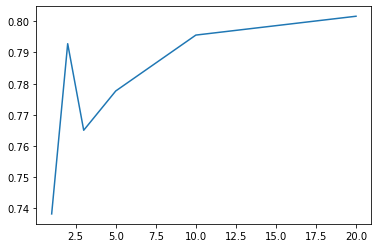

In [ ]:
import matplotlib.pyplot as plt
from sklearn import neighbors

score_test = []
k_val = [1, 2, 3, 5, 10, 20]
for k in k_val:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    score_test.append(clf.score(X_test, y_test))

plt.plot(k_val, score_test)

On remarque que l'implémentation de sklearn est considérablement plus rapide que notre implémentation naive. La courbe tracée précédement nous montre les performances pour différentes valeurs de l'hyperparamètre k. Nous traiterons plus en détail dans la prochaine Formation Pratique 7 le choix des hyperparamètres.

## 6.3 Arbres de décision

Les arbres décisionnels sont des méthodes de classification. Chaque noeud de l'arbre représente une condition sur une variable. Lorsque l'on construit l'arbre, on cherche d'abord à sélectionner les variables qui permettent le mieux de séparer nos données en deux groupes selon un certain critère (ex. entropie de Shannon, Gini). Un grand avantage des arbres décisionnels, c'est qu'il est généralement très facile d'interpréter les décisions de ces modèles. Appliquons un arbre décisionnel implémenté dans scikit-learn sur nos données:

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8057119459514792

Avec sklearn, on peut ainsi entrainer un arbre et le tester en seulement 3 lignes !

Maintenant, grâce au module graphviz nous pouvons visualiser l'arbre de décision qui a été construit (pour installer graphviz: pip install graphviz).

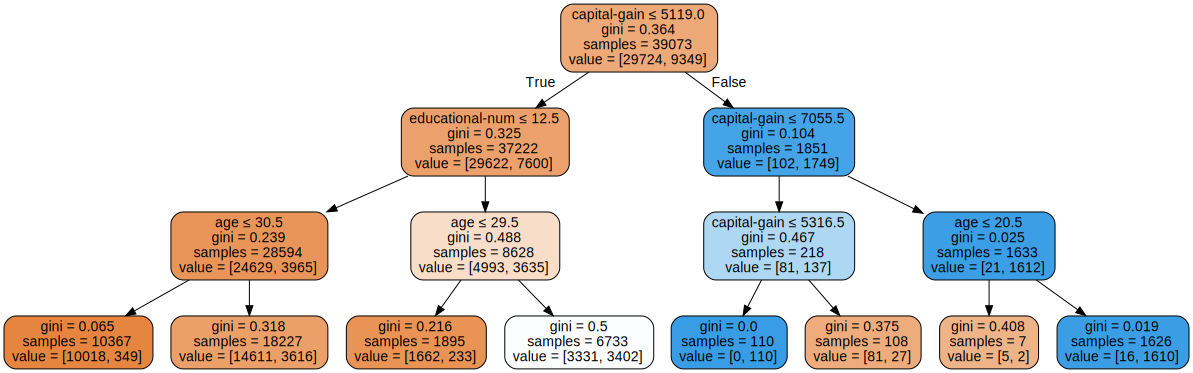

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=cts_columns,   
                         filled=True, rounded=True,  
                         special_characters=True) 

graph = graphviz.Source(dot_data)
graph

Nous pouvons constater que les caractéristiques capital-gain, educationnal-num et age sont utilisés pour la classification. De la même manière (mais c'est plus concis), l'attribut feature_importances_ du classifieur retourne l'importance accordée à chacune des caractéristiques.

In [ ]:
print(list(zip(cts_columns, clf.feature_importances_)))

[('age', 0.20444225321783052), ('fnlwgt', 0.0), ('educational-num', 0.2713516417000116), ('capital-gain', 0.5242061050821579), ('capital-loss', 0.0), ('hours-per-week', 0.0)]


Un hyperparamètre de notre arbre est *max_depth*, qui indique la profondeur maximale de l'arbre (dans notre cas, 3). Encore une fois, nous verrons dans la prochaine Formation Pratique 7 comment choisir les hyperparamètres.

Les arbres de décisions sont des modèles relativement simples dont les performances sont généralement décevantes sur des problèmes un tant soit peu complexe. Cependant, il est possible d'entrainer plusieurs arbres différents, et de combiner leurs prédictions en utilisant une *forêt d'arbres de décision*. Ce modèle peut s'avérer très puissant et est parfois la meilleure méthode connue sur certains types de problèmes.